# Machine Learning Engineer Nanodegree
## Deep Learning
## Project: Build a Digit Recognition Program

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

----
## Step 1: Design and Test a Model Architecture
Design and implement a deep learning model that learns to recognize sequences of digits. Train the model using synthetic data generated by concatenating character images from [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) or [MNIST](http://yann.lecun.com/exdb/mnist/). To produce a synthetic sequence of digits for testing, you can for example limit yourself to sequences up to five digits, and use five classifiers on top of your deep network. You would have to incorporate an additional ‘blank’ character to account for shorter number sequences.

There are various aspects to consider when thinking about this problem:
- Your model can be derived from a deep neural net or a convolutional network.
- You could experiment sharing or not the weights between the softmax classifiers.
- You can also use a recurrent network in your deep neural net to replace the classification layers and directly emit the sequence of digits one-at-a-time.

You can use ** Keras ** to implement your model. Read more at [keras.io](https://keras.io/).

Here is an example of a [published baseline model on this problem](http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/42241.pdf). ([video](https://www.youtube.com/watch?v=vGPI_JvLoN0)). You are not expected to model your architecture precisely using this model nor get the same performance levels, but this is more to show an exampe of an approach used to solve this particular problem. We encourage you to try out different architectures for yourself and see what works best for you. Here is a useful [forum post](https://discussions.udacity.com/t/goodfellow-et-al-2013-architecture/202363) discussing the architecture as described in the paper and here is [another one](https://discussions.udacity.com/t/what-loss-function-to-use-for-multi-digit-svhn-training/176897) discussing the loss function.

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib as mpl
 
from PIL import Image
import random

In [2]:
import pylab

In [3]:
from keras.utils.visualize_util import plot as keras_plot

Using TensorFlow backend.


In [4]:


### Your code implementation goes here.
### Feel free to use as many code cells as needed.

### Following code is copied from: https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [82]:
batch_size = 128
nb_classes = 10
nb_epoch = 12

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

In [83]:

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)



In [84]:
N_train = 20000
N_seq = 5
X_STrain = []
Y_STrain = []
for i in range(N_train):
    L = np.random.randint(0,5)
#     print (L)
    S_idx = [np.random.randint(0,X_train.shape[0]) if i < L else -1 for i in range(5)]
    X_STrain += [ np.concatenate( tuple([X_train[idx,:,:,:] if idx >= 0 else np.zeros(X_train[0].shape) for idx in S_idx ]) , axis=1) ]
#     plt.imshow(X_STrain[0][:,:,0])
    Y_STrain += [[L] + [y_train[idx] if idx >= 0 else idx  for idx in S_idx ]]
#     print (Y_STrain)

N_test = 3000
X_STest = []
Y_STest = []
for i in range(N_test):
    L = np.random.randint(0,6)
    S_idx = [np.random.randint(0,X_test.shape[0]) if i < L else -1 for i in range(5)]
    X_STest += [ np.concatenate( tuple([X_test[idx,:,:,:] if idx >= 0 else np.zeros(X_test[0].shape) for idx in S_idx ]) , axis=1) ]
    Y_STest += [[L] + [y_test[idx] if idx >= 0 else idx  for idx in S_idx ]]

In [85]:
Y_STrain = np.array(Y_STrain)
Y_STest = np.array(Y_STest)


In [86]:
X_STrain = np.array(X_STrain).astype('float32')
X_STest = np.array(X_STest).astype('float32')
X_STrain /= 255
X_STest /= 255
print('X_train shape:', X_STrain.shape)
print(X_STrain.shape[0], 'train samples')
print(X_STest.shape[0], 'test samples')
print(Y_STest[0])

# convert class vectors to binary class matrices
Y_STrain = [  np_utils.to_categorical(Y_STrain[:,i], 6 if i == 0 else 11) for i in range(N_seq+1)]
Y_STest = [  np_utils.to_categorical(Y_STest[:,i], 6 if i == 0 else 11 ) for i in range(N_seq+1)]

X_train shape: (20000, 28, 140, 1)
20000 train samples
3000 test samples
[ 1  8 -1 -1 -1 -1]


In [92]:
_, img_rows, img_cols, img_channels = X_STrain.shape
print (img_rows, img_cols, img_channels)


# model.reset_states()

model_input = Input(shape=(img_rows, img_cols, img_channels))
x = Convolution2D(32, 3, 3, border_mode='same')(model_input)
x = Activation('relu')(x)
x = Convolution2D(32, 3, 3)(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
conv_out = Flatten()(x)

L = Dense(N_seq+1, activation='softmax')(conv_out)
x1 = Dense(nb_classes + 1, activation='softmax')(conv_out, L)
x2 = Dense(nb_classes + 1, activation='softmax')(conv_out, L)
x3 = Dense(nb_classes + 1, activation='softmax')(conv_out, L)
x4 = Dense(nb_classes + 1, activation='softmax')(conv_out, L)
x5 = Dense(nb_classes + 1, activation='softmax')(conv_out, L)

lst = [L, x1, x2, x3, x4, x5]

model = Model(input=model_input, output=lst)
model.compile(loss=['categorical_crossentropy', 
                    'categorical_crossentropy', 'categorical_crossentropy', 
                    'categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy'], 
              optimizer='adadelta',metrics=['accuracy'])


28 140 1


In [93]:
model.fit(X_STrain, Y_STrain, batch_size=256, nb_epoch=5, verbose=1, validation_data=(X_STest, Y_STest))

Train on 20000 samples, validate on 3000 samples
Epoch 1/5
20000/20000 [==============================] - 39s - loss: 3.6266 - dense_20_loss: 0.2343 - dense_21_loss: 1.0731 - dense_22_loss: 0.9424 - dense_23_loss: 0.7502 - dense_24_loss: 0.4809 - dense_25_loss: 0.1457 - dense_20_acc: 0.9339 - dense_21_acc: 0.6723 - dense_22_acc: 0.7260 - dense_23_acc: 0.7901 - dense_24_acc: 0.8850 - dense_25_acc: 0.9882 - val_loss: 8.0222 - val_dense_20_loss: 2.6245 - val_dense_21_loss: 0.9466 - val_dense_22_loss: 0.5783 - val_dense_23_loss: 0.6240 - val_dense_24_loss: 0.6203 - val_dense_25_loss: 2.6285 - val_dense_20_acc: 0.8363 - val_dense_21_acc: 0.6930 - val_dense_22_acc: 0.8197 - val_dense_23_acc: 0.8553 - val_dense_24_acc: 0.8300 - val_dense_25_acc: 0.8370

In [94]:

y_predict = model.predict(X_STest)

[2, 1, 2, 10, 10, 10]

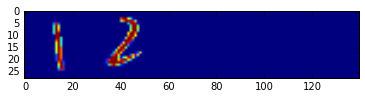

In [97]:
idx = 230
plt.imshow(X_STest[idx,:,:,0])
[np.argmax(y_predict[i][idx]) for i in range(len(y_predict))]

### Question 1
_What approach did you take in coming up with a solution to this problem?_

**Answer:** 

I built a Convolutional Neural Network model with multiple output Dense layers to predict the digit sequence.

### Question 2
_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)_

**Answer:**

Please refer to the following graph:

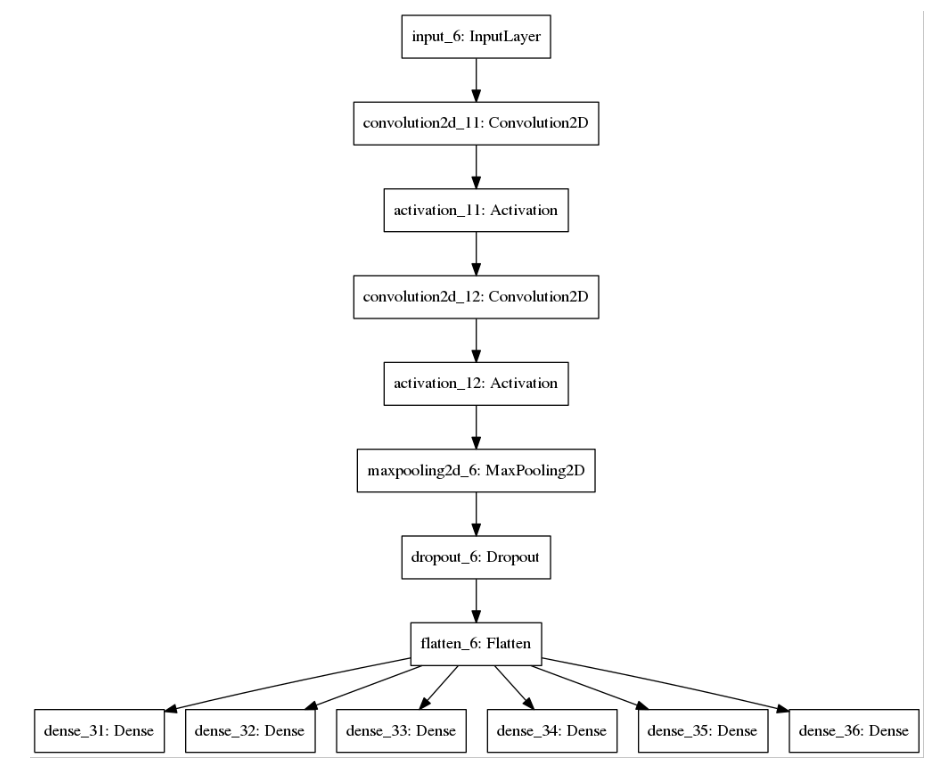

In [89]:
keras_plot(model, to_file="model.png")
image = mpl.image.imread("model.png")
plt.figure(figsize=(16, 32))
plt.imshow(image)
plt.axis('off')
plt.show()

### Question 3
_How did you train your model? How did you generate your synthetic dataset?_ Include examples of images from the synthetic data you constructed.

**Answer:**

* I trained the model with this function:
    > model.fit(X_STrain, Y_STrain, batch_size=256, nb_epoch=nb_epoch, verbose=1, validation_data=(X_STest, Y_STest))
    
* Synthetic dataset is generated by random combination of 5 single digits, with the following code:

> L = np.random.randint(0,5)

> S_idx = [np.random.randint(0,X_train.shape[0]) if i < L else -1 for i in range(5)]

> X_STrain += [ np.concatenate( tuple([X_train[idx,:,:,:] if idx >= 0 else np.zeros(X_train[0].shape) for idx in S_idx ]) , axis=1) ]

For example, the 46th testing sample in my testing set is shown as following:

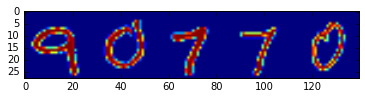

In [102]:
plt.imshow(X_STest[45,:,:,0])

----
## Step 2: Train a Model on a Realistic Dataset
Once you have settled on a good architecture, you can train your model on real data. In particular, the [Street View House Numbers (SVHN)](http://ufldl.stanford.edu/housenumbers/) dataset is a good large-scale dataset collected from house numbers in Google Street View. Training on this more challenging dataset, where the digits are not neatly lined-up and have various skews, fonts and colors, likely means you have to do some hyperparameter exploration to perform well.

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:


### Your code implementation goes here.
### Feel free to use as many code cells as needed.



In [7]:
import h5py

###
###   REF:  https://discussions.udacity.com/t/how-to-deal-with-mat-files/160657/4
###

# The DigitStructFile is just a wrapper around the h5py data.  It basically references 
#    inf:              The input h5 matlab file
#    digitStructName   The h5 ref to all the file names
#    digitStructBbox   The h5 ref to all struc data
class DigitStructFile:
    def __init__(self, inf):
        self.inf = h5py.File(inf, 'r')
        self.digitStructName = self.inf['digitStruct']['name']
        self.digitStructBbox = self.inf['digitStruct']['bbox']

# getName returns the 'name' string for for the n(th) digitStruct. 
    def getName(self,n):
        return ''.join([chr(c[0]) for c in self.inf[self.digitStructName[n][0]].value])

# bboxHelper handles the coding difference when there is exactly one bbox or an array of bbox. 
    def bboxHelper(self,attr):
        if (len(attr) > 1):
            attr = [self.inf[attr.value[j].item()].value[0][0] for j in range(len(attr))]
        else:
            attr = [attr.value[0][0]]
        return attr

# getBbox returns a dict of data for the n(th) bbox. 
    def getBbox(self,n):
        bbox = {}
        bb = self.digitStructBbox[n].item()
        bbox['height'] = self.bboxHelper(self.inf[bb]["height"])
        bbox['label'] = self.bboxHelper(self.inf[bb]["label"])
        bbox['left'] = self.bboxHelper(self.inf[bb]["left"])
        bbox['top'] = self.bboxHelper(self.inf[bb]["top"])
        bbox['width'] = self.bboxHelper(self.inf[bb]["width"])
        return bbox

    def getDigitStructure(self,n):
        s = self.getBbox(n)
        s['name']=self.getName(n)
        return s
# getAllDigitStructure returns all the digitStruct from the input file.     
    def getAllDigitStructure(self):
        return [self.getDigitStructure(i) for i in range(len(self.digitStructName))]

# Return a restructured version of the dataset (one structure by boxed digit).
#
#   Return a list of such dicts :
#      'filename' : filename of the samples
#      'boxes' : list of such dicts (one by digit) :
#          'label' : 1 to 9 corresponding digits. 10 for digit '0' in image.
#          'left', 'top' : position of bounding box
#          'width', 'height' : dimension of bounding box
#
# Note: We may turn this to a generator, if memory issues arise.
    def getAllDigitStructure_ByDigit(self):
        pictDat = self.getAllDigitStructure()
        result = []
        structCnt = 1
        for i in range(len(pictDat)):
            item = { 'filename' : pictDat[i]["name"] }
            figures = []
            for j in range(len(pictDat[i]['height'])):
                figure = {}
                figure['height'] = pictDat[i]['height'][j]
                figure['label']  = pictDat[i]['label'][j]
                figure['left']   = pictDat[i]['left'][j]
                figure['top']    = pictDat[i]['top'][j]
                figure['width']  = pictDat[i]['width'][j]
                figures.append(figure)
            structCnt = structCnt + 1
            item['boxes'] = figures
            result.append(item)
        return result

In [62]:
img_w,img_h = (192,32) 

def boxes2newbox(boxes):
    ans = {'left':[],
          'top':[],
          'bottom':[],
          'right':[]}
    for box in boxes:
        ans['left'] += [box['left']]
        ans['top'] += [box['top']]
        ans['right'] += [box['left'] + box['width']]
        ans['bottom'] += [box['top'] + box['height']]


    width = int(1.05 * (max(ans['right'])- min(ans['left'])) / len(boxes) * 6 )
    height = int(1.3 * (max(ans['bottom'])- min(ans['top'])))
    left = int(max(0, min(ans['left']) - width / 1.05 * 0.025))
    top = int(max(0, min(ans['top']) - height / 1.3 * 0.15))
    right = left + width
    bottom = top + height

    crop = (left, top, right, bottom)
#     print (crop)
    
    newboxes = [{'left':box['left'] - left,
          'top':box['top'] - top,
          'width':box['width'],
          'height':box['height']}
               for box in boxes]
    
    
    return crop, newboxes
        
            

def imgfile2array(filename, boxes=None):
    if boxes is not None:
        cropbox, newboxes = boxes2newbox(boxes)
    
    img = Image.open(filename)
#     plt.imshow(np.asarray(img))
#     plt.show()
    
    if boxes is not None:
        img = img.crop(cropbox)
    
#     plt.imshow(np.asarray(img))
#     plt.show()
    
    w,h = img.size
    
    img = img.resize((img_w,img_h), Image.ANTIALIAS)
    plt.imshow(np.asarray(img))
    plt.show()
    if boxes is not None:
        ans = (np.asarray(img.getdata()).reshape(img_w,img_h, 3), w,h, newboxes)
    else:
        ans = (np.asarray(img.getdata()).reshape(img_w,img_h, 3), w,h, None)
    
    del img
    return ans

In [9]:
training_struct = '/DATA/Street_View_House_Numbers_Dataset/train/digitStruct.mat'
testing_struct = '/DATA/Street_View_House_Numbers_Dataset/test/digitStruct.mat'

train_data = DigitStructFile(training_struct).getAllDigitStructure_ByDigit()
test_data = DigitStructFile(testing_struct).getAllDigitStructure_ByDigit()

In [25]:
max_num_length = 6
X_Train = []
Y_Train = []
BBOX_Train = []
ii = 0
for d in train_data:
    print ("\r processing {}/{}" .format(ii, len(train_data)), end='')
    ii += 1
    
    fn = d['filename']
    _X, _W, _H,newboxes = imgfile2array("/DATA/Street_View_House_Numbers_Dataset/train/{}".format(fn), d['boxes'])
    _Y = [int(v['label'] + 1e-9) for v in d['boxes']]
    _Y = [len(_Y)] + _Y + [0 for i in range(max_num_length - len(_Y) ) ]

    X_Train += [_X]
    Y_Train += [_Y]
    
    _BBOX = []
    for b in newboxes:
        _BBOX +=  [b['width'] / _W, b['top'] / _H, b['left'] / _W, b['height'] / _H] 
        
    while len(_BBOX) < 4 * max_num_length:
        _BBOX += [0.0,0.0,0.0,0.0]
    
    BBOX_Train += [_BBOX]
#     print ("BBOX_Train=",BBOX_Train)
    
#     print("d=",d)
#     if ii > 30:
#         break

 processing 33401/33402

In [26]:

X_Test = []
Y_Test = []
BBOX_Test = []
ii = 0
for d in test_data:
    print ("\r processing {}/{}" .format(ii, len(test_data)), end='')
    ii += 1
    
    fn = d['filename']
    _X, _W, _H,newboxes = imgfile2array("/DATA/Street_View_House_Numbers_Dataset/test/{}".format(fn), d['boxes'])
    _Y = [int(v['label'] + 1e-9) for v in d['boxes']]
    _Y = [len(_Y)] + _Y + [0 for i in range(max_num_length - len(_Y) ) ]
    
    X_Test += [_X]
    Y_Test += [_Y]
    
    
    _BBOX = []
    for b in newboxes:
        _BBOX +=  [b['width'] / _W, b['top'] / _H, b['left'] / _W, b['height'] / _H] 
        
    while len(_BBOX) < 4 * max_num_length:
        _BBOX += [0.0,0.0,0.0,0.0]
    
    BBOX_Test += [_BBOX]

 processing 13067/13068

In [27]:
Y_Train = np.array(Y_Train)
Y_Test = np.array(Y_Test)

In [28]:
Y_Train = [np_utils.to_categorical(Y_Train[:,i], max_num_length + 1 if i == 0 else 11) for i in range(max_num_length+1)]
Y_Test = [np_utils.to_categorical(Y_Test[:,i], max_num_length + 1 if i == 0 else 11) for i in range(max_num_length+1)]


X_Train = np.array(X_Train).astype('float32')
X_Test = np.array(X_Test).astype('float32')

X_Train /= 255
X_Test /= 255

print('X_train shape:', X_Train.shape)
print(X_Train.shape[0], 'train samples')
print(X_Test.shape[0], 'test samples')
print(Y_Test[0])

X_train shape: (33402, 192, 32, 3)
33402 train samples
13068 test samples
[[ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]]


In [29]:
BBOX_Train=np.array(BBOX_Train)
BBOX_Test=np.array(BBOX_Test)

In [170]:
SVHN_model.reset_states()

In [66]:
_, img_rows, img_cols, img_channels = X_Train.shape
print (img_rows, img_cols, img_channels)



model_input = Input(shape=(img_rows, img_cols, img_channels))

y = Convolution2D(32, 3, 3, activation="relu", border_mode="same")(model_input)
y = Convolution2D(32, 3, 3, activation="relu")(y)
y = MaxPooling2D((2, 2))(y)
y = Dropout(0.25)(y)

y = Convolution2D(32, 3, 3, border_mode="same", activation="relu")(y)
y = Convolution2D(32, 3, 3, activation="relu")(y)
y = MaxPooling2D((2, 2))(y)
y = Dropout(0.25)(y)

# y = Convolution2D(64, 3, 3, border_mode="same", activation="relu")(y)
# y = Convolution2D(64, 3, 3, activation="relu")(y)
# y = MaxPooling2D((2, 2))(y)
# y = Dropout(0.25)(y)

# x = Convolution2D(32, 3, 3, border_mode='same')(model_input)
# x = Activation('relu')(x)
# x = Convolution2D(32, 3, 3)(x)
# x = Activation('relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Dropout(0.25)(x)
# conv_out = Flatten()(x)

# y = Flatten()(y)
# y = Dense(1024, activation="relu")(y)
# y = Dropout(0.25)(y)
# conv_out = Dense(512, activation="relu")(y)

conv_out = Flatten()(y)

L = Dense(max_num_length+1, activation='softmax')(conv_out)
x1 = Dense(nb_classes + 1, activation='softmax')(conv_out)
x2 = Dense(nb_classes + 1, activation='softmax')(conv_out)
x3 = Dense(nb_classes + 1, activation='softmax')(conv_out)
x4 = Dense(nb_classes + 1, activation='softmax')(conv_out)
x5 = Dense(nb_classes + 1, activation='softmax')(conv_out)
x6 = Dense(nb_classes + 1, activation='softmax')(conv_out)


# conv_out = Dense(256, activation="relu")(y)
box = Dense(len(BBOX_Train[0]), activation='linear')(conv_out)

lst = [L, x1, x2, x3, x4, x5, x6,box]

SVHN_model = Model(input=model_input, output=lst)
SVHN_model.compile(loss=['categorical_crossentropy',
                         'categorical_crossentropy','categorical_crossentropy','categorical_crossentropy',
                         'categorical_crossentropy','categorical_crossentropy','categorical_crossentropy',
                        'mean_squared_error'], optimizer='Adam',metrics=['accuracy'])

192 32 3


In [67]:
SVHN_model.fit(X_Train, Y_Train+[BBOX_Train], batch_size=64, nb_epoch=10, verbose=1, 
               validation_data=(X_Test, Y_Test+[BBOX_Test]))

Train on 33402 samples, validate on 13068 samples
Epoch 1/10
33402/33402 [==============================] - 135s - loss: 6.1381 - dense_12_loss: 0.6572 - dense_13_loss: 1.9762 - dense_14_loss: 2.1919 - dense_15_loss: 1.0396 - dense_16_loss: 0.2313 - dense_17_loss: 0.0157 - dense_18_loss: 0.0126 - dense_19_loss: 0.0134 - dense_12_acc: 0.7446 - dense_13_acc: 0.2859 - dense_14_acc: 0.2153 - dense_15_acc: 0.6959 - dense_16_acc: 0.9558 - dense_17_acc: 0.9978 - dense_18_acc: 0.9981 - dense_19_acc: 0.7103 - val_loss: 5.6787 - val_dense_12_loss: 0.6745 - val_dense_13_loss: 1.9877 - val_dense_14_loss: 2.1601 - val_dense_15_loss: 0.7577 - val_dense_16_loss: 0.0865 - val_dense_17_loss: 0.0020 - val_dense_18_loss: 1.5717e-04 - val_dense_19_loss: 0.0101 - val_dense_12_acc: 0.7338 - val_dense_13_acc: 0.2876 - val_dense_14_acc: 0.2475 - val_dense_15_acc: 0.8215 - val_dense_16_acc: 0.9884 - val_dense_17_acc: 0.9998 - val_dense_18_acc: 1.0000 - val_dense_19_acc: 0.7189

In [ ]:
SVHN_model.save("/home/guangx/SVHN_model.h5")

In [65]:
SVHN_model = load_model("/home/guangx/SVHN_model.h5")

### Question 4
_Describe how you set up the training and testing data for your model. How does the model perform on a realistic dataset?_

**Answer:**

<!-- set up the training and testing data for your model -->
* The training and testing data are downloaded from http://ufldl.stanford.edu/housenumbers/;
* They firstly cropped based on the bounding boxes of all the digits;
* They are then resized to 192x32x3 before training and testing;
* Their pixel values are scaled to [0,1] by dividing by 255.

* The validation accuracy  for each output is:
    * Number of digits: 0.8939
    * Digit-1: 0.5022
    * Digit-2: 0.4979
    * Digit-3: 0.8532
    * Digit-4: 0.9863
    * Digit-5: 0.9998 
    * Digit-6: 1.0000
    * Bounding Box: 0.4776

### Question 5
_What changes did you have to make, if any, to achieve "good" results? Were there any options you explored that made the results worse?_

**Answer:**

I added more convolutional and pooling layers into the network.

> y = Convolution2D(32, 3, 3, border_mode="same", activation="relu")(y)

> y = Convolution2D(32, 3, 3, activation="relu")(y)

> y = MaxPooling2D((2, 2))(y)

> y = Dropout(0.25)(y)

But the result was not improved.

### Question 6
_What were your initial and final results with testing on a realistic dataset? Do you believe your model is doing a good enough job at classifying numbers correctly?_

**Answer:**


THe results with testing data is (this question seems to be overlapped with the question 4):
    * Number of digits: 0.8939
    * Digit-1: 0.5022
    * Digit-2: 0.4979
    * Digit-3: 0.8532
    * Digit-4: 0.9863
    * Digit-5: 0.9998 
    * Digit-6: 1.0000
    * Bounding Box: 0.4776
    
I do not believe my model is doing a good enough job.

----
## Step 3: Test a Model on Newly-Captured Images

Take several pictures of numbers that you find around you (at least five), and run them through your classifier on your computer to produce example results. Alternatively (optionally), you can try using OpenCV / SimpleCV / Pygame to capture live images from a webcam and run those through your classifier.

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:


### Your code implementation goes here.
### Feel free to use as many code cells as needed.



In [80]:
def predict_imgfile(filename):
    new_img, W, H,_ = imgfile2array(filename)
#     print(new_img)
#     plt.imshow(new_img)
#     plt.show()
    new_img_pred = SVHN_model.predict(np.array([new_img]))
    ans = [np.argmax(new_img_pred[i][0]) for i in range(len(new_img_pred)-1)]
    BBOX =  new_img_pred[-1][0]
    print (ans)
    print ("Bounding box: ", [BBOX[i*4:(i*4 + 4)] for i in range(6)])
    return [0 if v == 10 else (v if v != 0 else -1) for v in ans[1:(ans[0]+1)]]

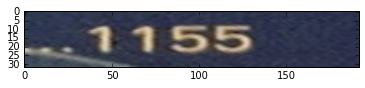

[4, 3, 6, 10, 9, 0, 0]
Bounding box:  [array([ -3.55575728,  16.78127098,   4.07297707,   2.62448597], dtype=float32), array([ 11.86146927,  18.50557137,  18.29588127,  41.13657761], dtype=float32), array([ 10.0426445 ,  11.83848572,  28.70856285,  68.61681366], dtype=float32), array([  2.89064288,   8.02334785,  11.06560707,  21.60972977], dtype=float32), array([ -3.58260655,  12.52515125,  11.56495667,   9.07242775], dtype=float32), array([ 5.1505909 ,  1.0868082 ,  1.11443913,  0.4052946 ], dtype=float32)]


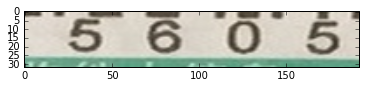

[3, 2, 6, 9, 0, 0, 0]
Bounding box:  [array([ 26.68953514,  24.02139854, -42.78644943,  34.89562607], dtype=float32), array([  19.8799572 ,   18.09573746,   48.96366882,  114.07533264], dtype=float32), array([  31.44982529,   27.89088631,   63.334198  ,  125.60375214], dtype=float32), array([ 2.97635436, -0.03163413, -1.53019357, -3.57531881], dtype=float32), array([ 22.35294151, -27.16224289,  -9.25511646,  17.13645363], dtype=float32), array([-13.23976135, -18.19660378,  -6.19026852,  10.99837589], dtype=float32)]


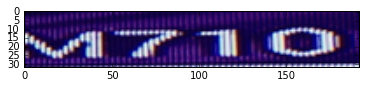

[3, 7, 7, 7, 0, 0, 0]
Bounding box:  [array([  3.55682683,  35.73862839,   0.98768294,   2.83712363], dtype=float32), array([ 20.64389992,   1.47864318, -21.00726509,  57.53121185], dtype=float32), array([  44.36257172,   24.55761337,   67.53586578,  131.72003174], dtype=float32), array([-30.75929451, -15.62912178,  14.16689301,   3.74994707], dtype=float32), array([ 12.86274338,  20.94601059,  -1.10775304,  -2.1685102 ], dtype=float32), array([ -4.42377472, -16.46212196,  -2.69581604,  -4.13910484], dtype=float32)]


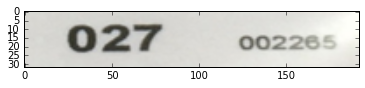

[3, 1, 6, 1, 0, 0, 0]
Bounding box:  [array([-0.1296415 , -3.74078059, -3.08492112,  2.85681653], dtype=float32), array([  5.75862551,   3.87514734,  -0.94293195,  11.27526855], dtype=float32), array([ 17.69908714,  12.29117012,  33.96214676,  59.38781738], dtype=float32), array([ -4.52756596,   3.11129498,   8.67331982,  17.3231144 ], dtype=float32), array([  2.86066318,   7.4001894 ,  -2.04843402,  14.15866184], dtype=float32), array([ 0.35968673,  4.50433493,  1.3018688 ,  6.59990931], dtype=float32)]


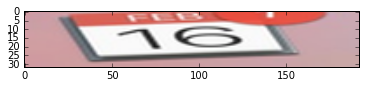

[3, 1, 3, 10, 0, 0, 0]
Bounding box:  [array([  7.02563763,   1.66364217, -14.12132072,  33.02043915], dtype=float32), array([ 26.33696175,   0.93313247,  10.48813343,  26.21125984], dtype=float32), array([  48.1102829 ,   19.68878365,   60.23361206,  106.1588974 ], dtype=float32), array([-12.12808704,   2.43876147,   0.21630572,  -8.51735115], dtype=float32), array([ -1.70828867,  -0.37170807, -21.86831665, -16.37915993], dtype=float32), array([ -2.67234898,   2.56314087,  -0.6580618 , -14.75083351], dtype=float32)]


In [81]:
for i in range(1,6):
    predict_imgfile("./Newly_Captured_Image_{}.jpg".format(i))

### Question 7
_Choose five candidate images of numbers you took from around you and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult?_

**Answer:**

Actually, non of them get good predictions.

### Question 8
_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the realistic dataset?_

**Answer:**

No, non of them get good predictions.


### Optional: Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._

**Answer:** Leave blank if you did not complete this part.

----
### Step 4: Explore an Improvement for a Model

There are many things you can do once you have the basic classifier in place. One example would be to also localize where the numbers are on the image. The SVHN dataset provides bounding boxes that you can tune to train a localizer. Train a regression loss to the coordinates of the bounding box, and then test it. 

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:


### Your code implementation goes here.
### Feel free to use as many code cells as needed.



In [ ]:
############################
#####
#####

###  The code in the Step 2: Train a Model on a Realistic Dataset
### has already included the bounding box predictor. 
### The model has also been trained for the boudning box. However, the result is not good

### Question 10
_How well does your model localize numbers on the testing set from the realistic dataset? Do your classification results change at all with localization included?_

**Answer:**

The predicted bounding boxes are very bad.

### Question 11
_Test the localization function on the images you captured in **Step 3**. Does the model accurately calculate a bounding box for the numbers in the images you found? If you did not use a graphical interface, you may need to investigate the bounding boxes by hand._ Provide an example of the localization created on a captured image.

**Answer:**

Because the predicted bounding box is very bad. I did not test it.

----
## Optional Step 5: Build an Application or Program for a Model
Take your project one step further. If you're interested, look to build an Android application or even a more robust Python program that can interface with input images and display the classified numbers and even the bounding boxes. You can for example try to build an augmented reality app by overlaying your answer on the image like the [Word Lens](https://en.wikipedia.org/wiki/Word_Lens) app does.

Loading a TensorFlow model into a camera app on Android is demonstrated in the [TensorFlow Android demo app](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/android), which you can simply modify.

If you decide to explore this optional route, be sure to document your interface and implementation, along with significant results you find. You can see the additional rubric items that you could be evaluated on by [following this link](https://review.udacity.com/#!/rubrics/413/view).

### Optional Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:


### Your optional code implementation goes here.
### Feel free to use as many code cells as needed.



### Documentation
Provide additional documentation sufficient for detailing the implementation of the Android application or Python program for visualizing the classification of numbers in images. It should be clear how the program or application works. Demonstrations should be provided. 

_Write your documentation here._

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.